Functional API를 통해서 더 복잡한 구조의 모델을 만들 수 있다. 

https://www.tensorflow.org/guide/keras/functional

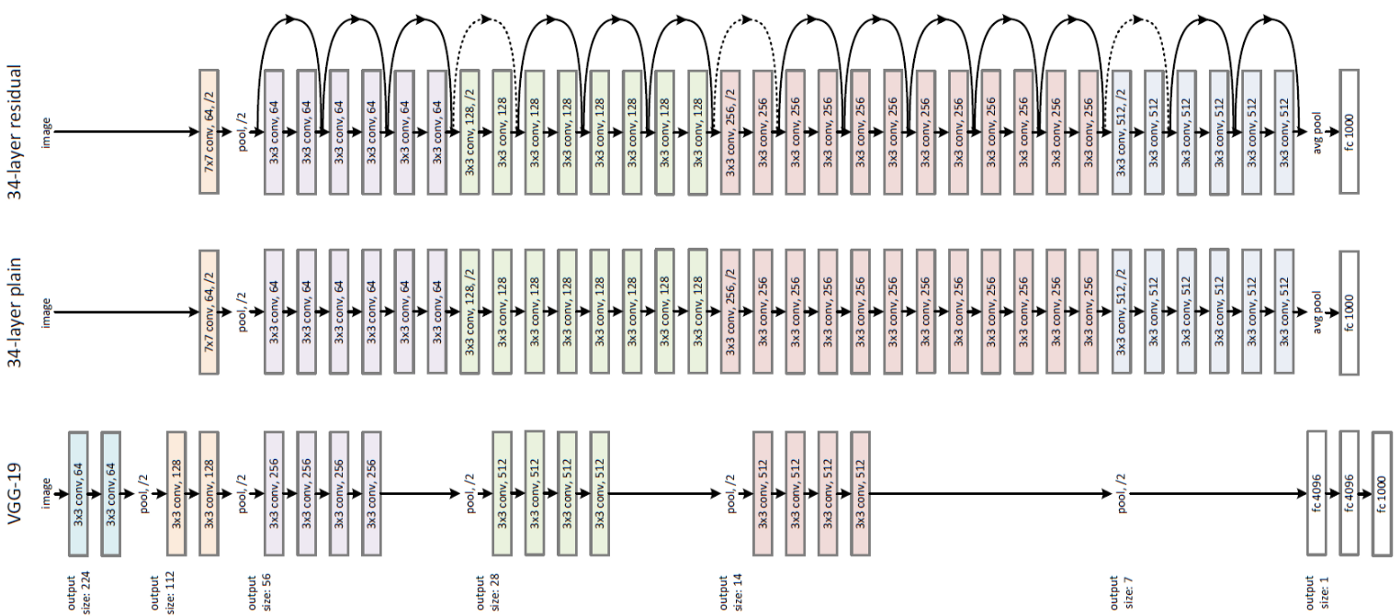

In [2]:
import tensorflow as tf

# 데이터 불러오기
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 Scaling
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


간단한 MNIST 모델을 Functional API로 만들어봅시다

In [6]:
# 시퀀셜 모델 

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

In [7]:
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten
from tensorflow.keras import Model

In [8]:
# 함수형 API 는 한개씩 변수를 통해 인풋 아웃풋을 연결합니다

in_ = Input(shape=(28,28))
x = Flatten()(in_)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.2)(x)
out_ = Dense(10, activation = 'softmax')(x)
model2 = Model(inputs = in_, outputs=out_)

In [9]:
# 모델 컴파일하기
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2941 - accuracy: 0.9144
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1411 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1050 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0875 - accuracy: 0.9728
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0754 - accuracy: 0.9766


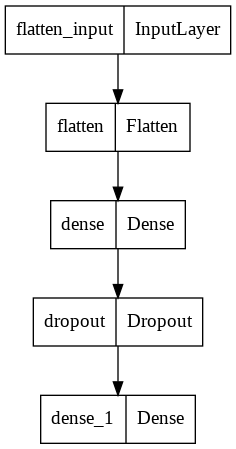

In [10]:
tf.keras.utils.plot_model(model)

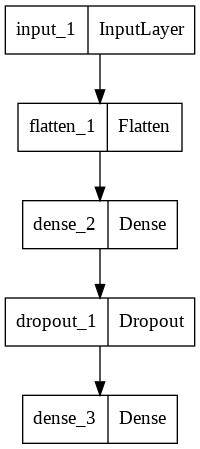

In [11]:
tf.keras.utils.plot_model(model2)

Boston_housing Data를 사용해서 입력이 2개인 모델을 만들어봅시다

https://www.kaggle.com/c/boston-housing

In [12]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [13]:
print(x_train.dtype, y_train.dtype)
print(x_train.shape, y_train.shape)
print(y_test.shape)

float64 float64
(404, 13) (404,)
(102,)


In [14]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [15]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [16]:
import pandas as pd
df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [17]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


입력을 두개로 분할해서 2개의 입력이 있는 상황으로 진행해봅시다

In [18]:
x_train1, x_train2 = x_train[:, :10], x_train[:,10:]
x_test1, x_test2 = x_test[:, :10], x_test[:,10:]

In [19]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model


In [20]:
input_A = Input(shape=[10])
input_B = Input(shape=[3])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 16)           176         ['input_2[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 16)           272         ['dense_4[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 3)]          0           []                               
                                                                                            

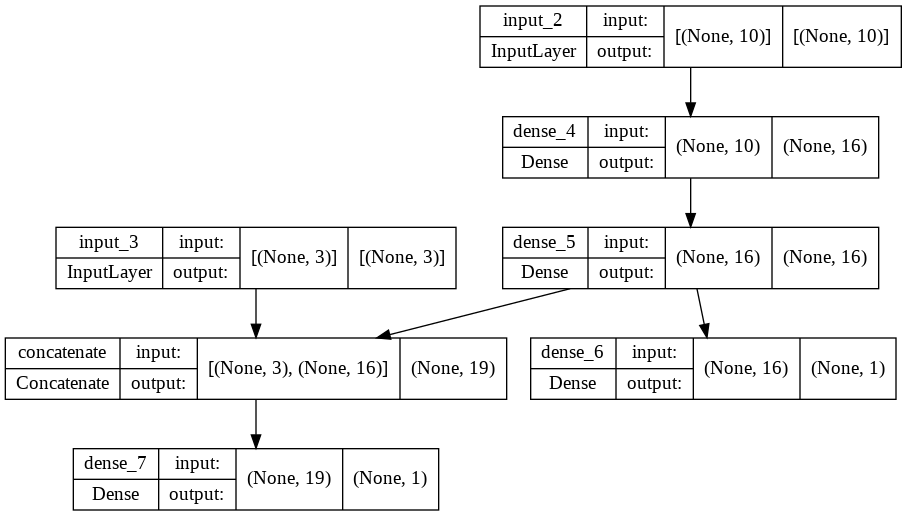

In [21]:
h1 = Dense(16, activation='relu')(input_A)
h2 = Dense(16, activation='relu')(h1)
concat = concatenate([input_B, h2])
out1 = Dense(1)(h2)
out2 = Dense(1)(concat)
model = Model(inputs = [input_A, input_B], outputs = [out1, out2])
model.summary()
plot_model(model, show_shapes=True)


In [22]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.2, 0.8], optimizer='RMSprop')
history = model.fit([x_train1, x_train2], [y_train, y_train], epochs=10, validation_data=([x_test1, x_test2], [y_test, y_test]))

Epoch 1/10
13/13 [==============================] - 1s 38ms/step - loss: 631.6392 - dense_6_loss: 1016.1790 - dense_7_loss: 535.5042 - val_loss: 298.7435 - val_dense_6_loss: 522.0083 - val_dense_7_loss: 242.9273
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 266.4975 - dense_6_loss: 377.7263 - dense_7_loss: 238.6903 - val_loss: 243.7595 - val_dense_6_loss: 397.3654 - val_dense_7_loss: 205.3580
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 240.4500 - dense_6_loss: 349.0974 - dense_7_loss: 213.2881 - val_loss: 217.7408 - val_dense_6_loss: 377.0251 - val_dense_7_loss: 177.9197
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 214.2194 - dense_6_loss: 331.0725 - dense_7_loss: 185.0061 - val_loss: 223.0818 - val_dense_6_loss: 365.2385 - val_dense_7_loss: 187.5427
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 189.1124 - dense_6_loss: 317.4996 - dense_7_loss: 157.0155 - val_loss: 179.5574 - val_

Toy Residual Block을 만들어 봅시다

In [26]:
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = tf.keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_8 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_7[0][0]']               
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_8[0][0]']               
                                                                                         

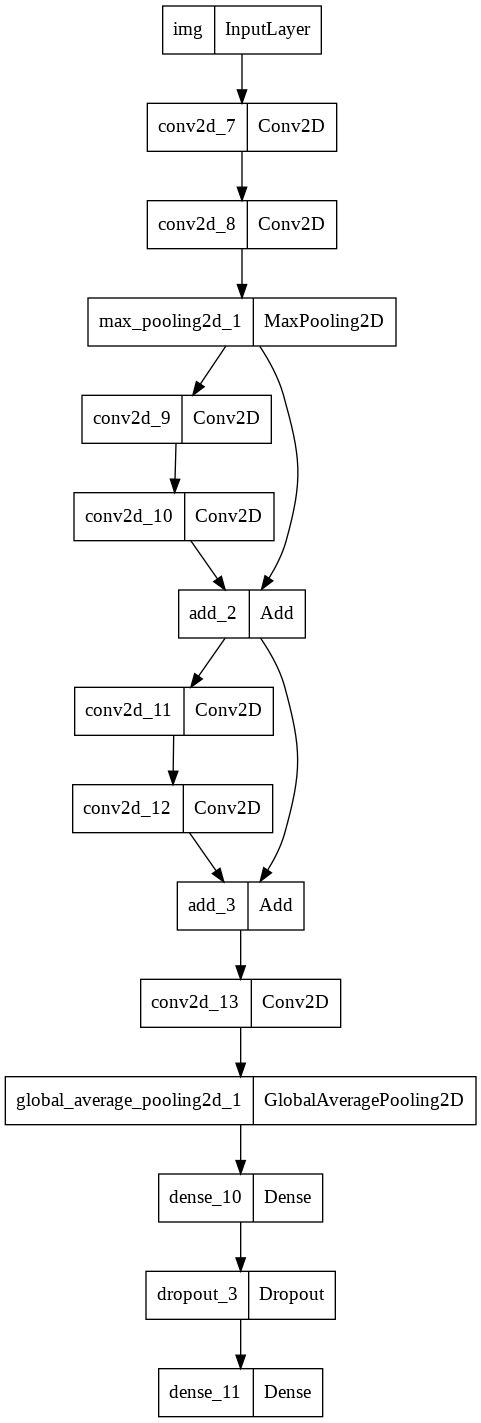

In [27]:
plot_model(model)